<a href="https://colab.research.google.com/github/Pullsu/Uczenie-maszynowe-w-finansach/blob/Use-Case-2/Use_case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Podstawowe importy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Dane
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# 1. Przegląd danych:

## 1.1 Podaj liczbę filmów dla dzieci

In [ ]:
movies_for_children = movies['genres'].str.contains('Children').sum()
print("Liczba filmów dla dzieci wynosi:", movies_for_children)

Liczba filmów dla dzieci wynosi: 664


## 1.2 Pokaż rozkład ocen filmów z 1995

In [ ]:
# Łączę ramki danych
merged_data = pd.merge(ratings, movies, on='movieId', how='inner')

In [ ]:
# Wyodrębniam rok z kolumny 'title'
merged_data['release_year'] = merged_data['title'].str.extract(r'\((\d{4})\)')

In [ ]:
merged_data

,userId,movieId,rating,timestamp,title,genres,release_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,1997
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1971
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,2005
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,2016


In [ ]:
# Filmy z 1995 roku
movies_1995 = merged_data[merged_data['release_year'] == '1995']

<ipython-input-12-a66b21ac533b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=movies_1995, palette='viridis')


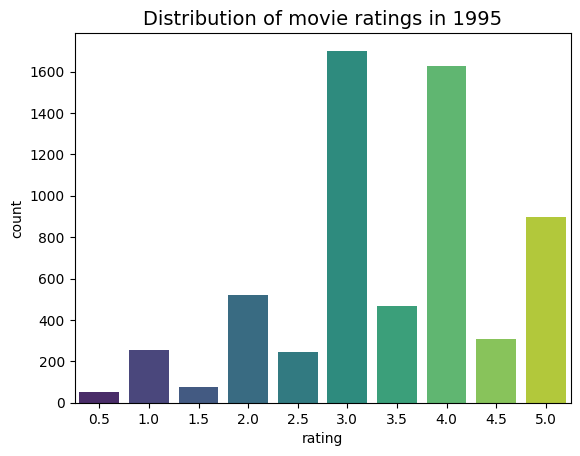

In [ ]:
# Wykres
sns.countplot(x='rating', data=movies_1995, palette='viridis')
plt.title('Distribution of movie ratings in 1995', fontsize=14)
plt.show()

## 1.3 Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane

In [ ]:
# Filtrowanie filmów
action_movies = merged_data[merged_data['genres'].str.contains('Action')]

In [ ]:
action_movies.head()

,userId,movieId,rating,timestamp,title,genres,release_year
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995
268,6,6,4.0,845553757,Heat (1995),Action|Crime|Thriller,1995
269,11,6,5.0,902154266,Heat (1995),Action|Crime|Thriller,1995
270,18,6,4.0,1460138360,Heat (1995),Action|Crime|Thriller,1995
271,23,6,4.0,1107342267,Heat (1995),Action|Crime|Thriller,1995


In [ ]:
# Średnia ocen filmów akcji
average_rating_action = action_movies['rating'].mean()
print("Średnia ocen wszystkich filmów akcji wynosi:", average_rating_action.round(2))

Średnia ocen wszystkich filmów akcji wynosi: 3.45


In [ ]:
# 3 najwyżej oceniane filmy akcji
top_3_action_movies = action_movies.groupby('title')['rating'].mean().nlargest(3)
top_3_action_movies

title
Alien Contamination (1980)                                         5.0
Assignment, The (1997)                                             5.0
Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)    5.0
Name: rating, dtype: float64

Być może w bazie znajduje się więcej niż 3 "najwyżej oceniane filmy"?
Sprawdźmy to.

In [ ]:
action_movies_avg_ratings = action_movies.groupby('title')['rating'].mean()
top_action_movies = action_movies_avg_ratings[action_movies_avg_ratings == 5.0]
print("Okazuje się, że w bazie mamy", top_action_movies.count(), "najwyżej oceniane filmy.")
print("Poniżej znajdują się ich tytuły:")

Okazuje się, że w bazie mamy 24 najwyżej oceniane filmy.
Poniżej znajdują się ich tytuły:


In [ ]:
top_action_movies

title
Alien Contamination (1980)                                            5.0
Assignment, The (1997)                                                5.0
Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)       5.0
Branded to Kill (Koroshi no rakuin) (1967)                            5.0
Crippled Avengers (Can que) (Return of the 5 Deadly Venoms) (1981)    5.0
Faster (2010)                                                         5.0
Galaxy of Terror (Quest) (1981)                                       5.0
Justice League: Doom (2012)                                           5.0
Knock Off (1998)                                                      5.0
Last Hurrah for Chivalry (Hao xia) (1979)                             5.0
Love Exposure (Ai No Mukidashi) (2008)                                5.0
Maniac Cop 2 (1990)                                                   5.0
Max Manus (2008)                                                      5.0
On the Other Side of the Tracks 

# 2. System rekomendacyjny:

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163005 sha256=c4d61ebbb1875b6fe613f42a4cb862395233f973e9dae68f6fea3b3bacee58ce
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Importy z biblioteki surprise
from surprise import Dataset, Reader
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import GridSearchCV, train_test_split, cross_validate

In [ ]:
# Słownik mapujący identyfikatory filmów na tytuły
movie_titles = dict(zip(movies['movieId'], movies['title']))

In [ ]:
# tworzenie obiektu surprise
reader = Reader(rating_scale=(0.5, 5))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

## KNNWithMeans

In [ ]:
# Wykorzystaj metodę hiperparametryzacji GridSearch do wyboru liczby sąsiadów od 3-10
param_grid_knn = {
    'k': [3, 4, 5, 6, 7, 8, 9, 10],  # wartości 'k' do przetestowania
    'sim_options': {
        'name': ['pearson'],
        'user_based': [False],
    }
}
grid_search_knn = GridSearchCV(KNNWithMeans, param_grid_knn, measures=['rmse'], cv=5, n_jobs=-1)
grid_search_knn.fit(data)

In [ ]:
# Najlepsze parametry dla KNNWithMeans
best_knn_params = grid_search_knn.best_params['rmse']
print("Najlepsze parametry dla KNNWithMeans:", best_knn_params)

Najlepsze parametry dla KNNWithMeans: {'k': 10, 'sim_options': {'name': 'pearson', 'user_based': False}}


Optymalna liczba sąsiadów to k=10

In [ ]:
# Trenujemy model KNNWithMeans z najlepszymi parametrami
knn = KNNWithMeans(**best_knn_params)
knn.fit(data.build_full_trainset())

Computing the pearson similarity matrix...
Done computing similarity matrix.


### Rekomendacje po obejrzeniu filmu NeverEnding Story III

In [ ]:
movie_title = 'NeverEnding Story III, The (1994)'
movie_id = movies[movies['title'] == movie_title]['movieId']
print("ID filmu 'NeverEnding Story III':", movie_id.values)

ID filmu 'NeverEnding Story III': [126]


In [ ]:
# Identyfikator filmu, dla którego chcemy rekomendacje
neverending_movie_id = 126

In [ ]:
# Funkcja do uzyskania rekomendacji
def get_similar_movies(movie_id, top_n=10):
    inner_id = knn.trainset.to_inner_iid(movie_id)
    neighbors = knn.get_neighbors(inner_id, k=top_n)
    raw_neighbors = [knn.trainset.to_raw_iid(inner_id) for inner_id in neighbors]
    return [movie_titles[movie_id] for movie_id in raw_neighbors]  # Zamiana id na tytuły

In [ ]:
# Generowanie rekomendacji
similar_movies = get_similar_movies(neverending_movie_id, top_n=10)

print("Rekomendacje:", similar_movies)

Rekomendacje: ['Heat (1995)', 'Ed Wood (1994)', 'Mrs. Doubtfire (1993)', 'Independence Day (a.k.a. ID4) (1996)', 'E.T. the Extra-Terrestrial (1982)', 'Abyss, The (1989)', 'Alien (1979)', 'Highlander (1986)', 'Batman Returns (1992)', 'Face/Off (1997)']


### Rekomendacje po obejrzeniu filmu Pi

In [ ]:
# Sprawdzenie id filmu Pi
movie_title_2 = 'Pi (1998)'
movie_id_2 = movies[movies['title'] == movie_title_2]['movieId']
print("ID filmu 'Pi':", movie_id_2.values)

ID filmu 'Pi': [1921]


In [ ]:
# Identyfikator filmu
pi_movie_id = 1921

In [ ]:
# Generowanie rekomendacji
similar_movies = get_similar_movies(pi_movie_id, top_n=10)

print("Rekomendacje:", similar_movies)

Rekomendacje: ['Adventures of Robin Hood, The (1938)', 'Shaft (1971)', 'Warrior (2011)', 'On Golden Pond (1981)', 'Flirting With Disaster (1996)', 'With Honors (1994)', 'Closet, The (Placard, Le) (2001)', 'City Hall (1996)', 'Houseguest (1994)', 'Specialist, The (1994)']


Czym różni się algorytm kNN with means od standardowego kNN?
---
KNN to nadzorowana metoda uczenia maszynowego używana do klasyfikacji, natomiast KNNWithMeans jest nienadzorowaną metodą UM używaną do grupowania danych (clustering).